# 사용 라이브러리

In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import riskfolio as rp

# 글로벌 데이터 다운로드

In [13]:
tickers =[
    'SPY', # 미국 주식
    'IEV', # 유럽 주식
    'EWJ', # 일본 주식
    'EEM', # 어머징 주식
    'TLT', # 미국 장기채
    'IEF', # 미국 중기채
    'IYR', # 미국 리츠
    'RWX', # 글로벌 리츠
    'GLD', # 금
    'DBC' # 상품
]

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker, start='1993-01-22')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 다운 받은 데이터의 수익률 구하기

In [20]:
prices = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
prices = prices.fillna(method='ffill') # NaN값의 경우 이전 값으로 대체해주기

rets = prices.pct_change(1).dropna() # 일간 수익률 나타내기

# 데이터 수익률간 상관관계 파악하기

<AxesSubplot:>

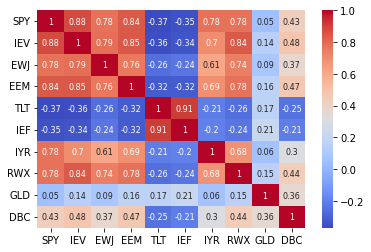

In [21]:
# 각 열들간의 상관관계 나타내기
sns.heatmap(rets.corr().round(2), annot = True, annot_kws = {'size':8}, cmap='coolwarm')

# 최대샤프지수 포트폴리오 계산하기

In [28]:
# 포트폴리오 객체 생성
port = rp.Portfolio(returns = rets) # 각 투자 자산별 수익률 넣어주기

# 입력값 계산
method_mu = 'hist' # 역사적 데이터를 바탕으로 기대 수익률 추정
method_cov = 'hist' # 역사적 데이터를 바탕으로 분산-공분산 행렬 추정

# 객체에 수익률 및 분산-공분산 입력
port.assets_stats(method_mu = method_mu, methode_cov = method_cov)

model = 'Classic' # 모델 입력. Classic(역사적 데이터), BL(블랙-리터만), FM(팩터 모형)
rm = 'MV' # 위험 측정 방법, MV는 표준편차를 의미
obj = 'Sharpe' # 목적함수, MinRist(최소분산), MaxRet(최대수익률, Utility(효용) or Sharpe(샤프지수)
hist = True # 역사적 데이터 사용
rf = 0 # 무위험 수익률
l = 0 # 위험 회피 계수, obj가 'Utility'일 때만 사용

# 최적화
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w, 4)

,weights
SPY,0.2322
IEV,0.0000
EWJ,0.0000
EEM,0.0000
TLT,0.0000
IEF,0.6686
IYR,0.0000
RWX,0.0000
GLD,0.0992
DBC,0.0000


## 효율적 투자선
- 각 포트폴리오의 기대수익률과 위험수준을 바탕으로, 구성할 수 있는 모든 포트폴리오를 나타낸 것

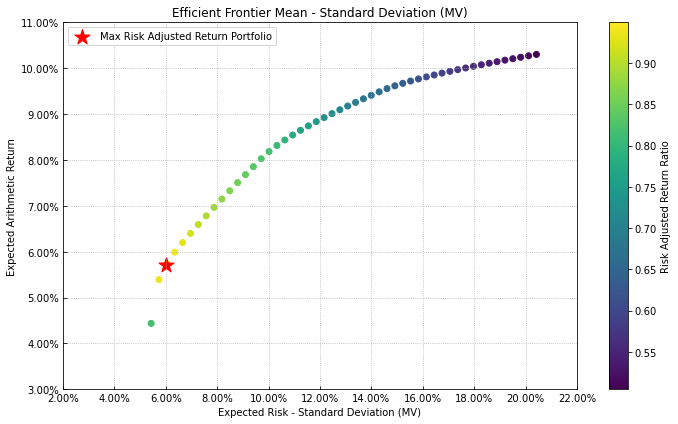

In [33]:
points = 50 # 효율적 투자선을 구성하는 샘플의 갯수
frontier = port.efficient_frontier(model=model,
                                  rm=rm,
                                  points=points,
                                  rf=rf,
                                  hist=hist)
label = "Max Risk Adjusted Return Portfolio"
mu=port.mu # 기대수익률
cov = port.cov # 분산-공분산 행렬
returns = port.returns #자산 별 수익률

ax = rp.plot_frontier(w_frontier = frontier,
                     mu=mu,
                     cov=cov,
                     returns=returns,
                     rm=rm,
                     rf=rf,
                     alpha=0.05,
                     cmap='viridis',
                     w=w,
                     label=label,
                     marker='*',
                     s=16,
                     c='r',
                     height=6,
                     width=10,
                     ax=None)